# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D \
_Student No._: 2021-04594 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import model_selection, metrics

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


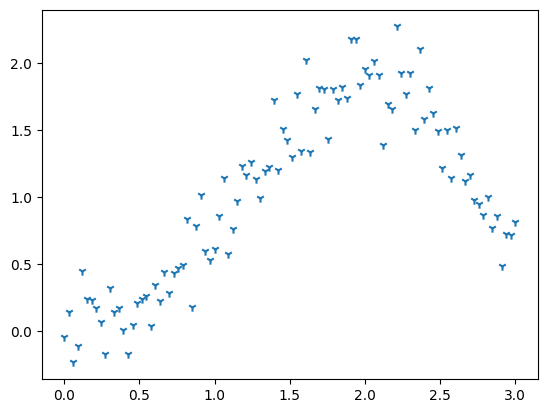

In [2]:
x = np.linspace(0, 3, 100) # creating 100 regularly-spaced points from 0 to 3 as values of x
eps = np.random.normal(0, 0.2, 100) # creating 100 random points (from the normal distribution)

def f(x): # defining the function
  return x*np.sin(x) + eps

y = f(x) # storing as y

plt.scatter(x, y, marker='1') # plotting

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


In [3]:
x_train, x_testi, y_train, y_testi = model_selection.train_test_split(x, y, test_size=0.5, random_state=100)
x_testf, x_cvad, y_testf, y_cvad = model_selection.train_test_split(x_train, y_train, test_size=0.5, random_state=100)

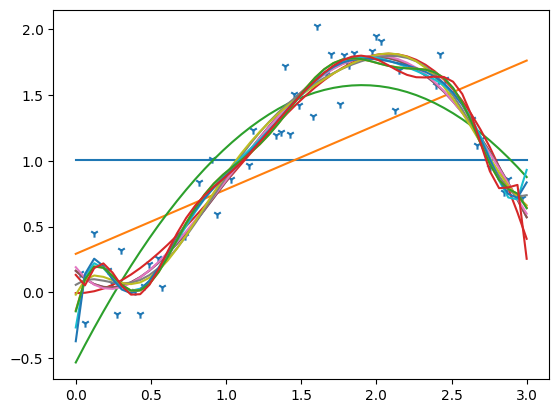

In [6]:
polyline = np.linspace(0, 3, 50)
model_array = []

for i in np.arange(0, 14, 1):
  model = np.poly1d(np.polyfit(x_train, y_train, i))
  model_array.append(model(polyline))

for j in np.arange(0, 14, 1):
  plt.plot(polyline, model_array[j])

plt.scatter(x_train, y_train, marker="1")

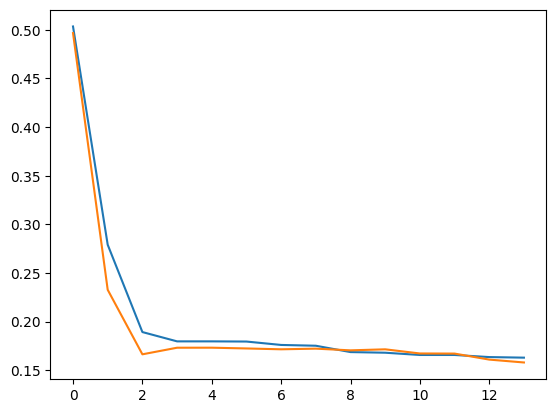

In [5]:
polyline2 = np.linspace(0, 3, 25)
model_array2 = []
model_array3 = []
metrics_test_list = []
metrics_cvad_list = []

for i in np.arange(1, 15, 1):
  model = np.poly1d(np.polyfit(x_train, y_train, i))
  model_array2.append(model(x_train))
  model_array3.append(model(x_cvad))
  metrics_test_list.append(metrics.mean_squared_error(y_train, model_array2[j], squared=False))
  metrics_cvad_list.append(metrics.mean_squared_error(y_cvad, model_array3[j], squared=False))

for j in np.arange(0, 14, 1):


plt.plot(np.arange(0, 14, 1), metrics_test_list)
plt.plot(np.arange(0, 14, 1), metrics_cvad_list)